<a href="https://colab.research.google.com/github/Gowri4622/basic-nn-model/blob/main/FirstMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
worksheet = gc.open('DLDataset').sheet1

rows = worksheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])

df.head(n=9)

,X,Y
0,1,13
1,2,19
2,3,25
3,4,31
4,5,37
5,6,43
6,7,49
7,8,55
8,9,61


In [5]:
df.dtypes

X    object
Y    object
dtype: object

In [6]:
df = df.astype({'X':'float'})
df = df.astype({'Y':'float'})

In [7]:
df.dtypes

X    float64
Y    float64
dtype: object

In [8]:
x=df[['X']].values

In [9]:
x

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [10]:
y=df[['Y']].values

In [11]:
y

array([[13.],
       [19.],
       [25.],
       [31.],
       [37.],
       [43.],
       [49.],
       [55.],
       [61.]])

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=50)


In [13]:
X_train

array([[3.],
       [2.],
       [6.],
       [4.],
       [9.],
       [1.]])

In [14]:
#to scale the input from 0 to 1
scaler=MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train_scaled=scaler.transform(X_train)

In [17]:
X_train_scaled

array([[0.25 ],
       [0.125],
       [0.625],
       [0.375],
       [1.   ],
       [0.   ]])

In [18]:
ai_brain=Sequential([
    Dense(2,activation='relu'),
    Dense(1)
])

In [19]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [20]:
ai_brain.fit(x=X_train_scaled,y=Y_train,epochs=20000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 6ms/step - loss: 6.0441e-05
Epoch 17502/20000
1/1 [==============================] - 0s 6ms/step - loss: 6.0442e-05
Epoch 17503/20000
1/1 [==============================] - 0s 6ms/step - loss: 6.0364e-05
Epoch 17504/20000
1/1 [==============================] - 0s 6ms/step - loss: 6.0371e-05
Epoch 17505/20000
1/1 [==============================] - 0s 6ms/step - loss: 6.0324e-05
Epoch 17506/20000
1/1 [==============================] - 0s 6ms/step - loss: 6.0348e-05
Epoch 17507/20000
1/1 [==============================] - 0s 6ms/step - loss: 6.0324e-05
Epoch 17508/20000
1/1 [==============================] - 0s 6ms/step - loss: 6.0348e-05
Epoch 17509/20000
1/1 [==============================] - 0s 6ms/step - loss: 6.0358e-05
Epoch 17510/20000
1/1 [==============================] - 0s 6ms/step - loss: 6.0445e-05
Epoch 17511/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.0451e-05

In [21]:
loss_df=pd.DataFrame(ai_brain.history.history)


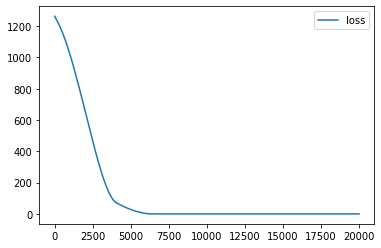

In [22]:
loss_df.plot()

In [23]:
X_test

array([[5.],
       [7.],
       [8.]])

In [24]:
X_test_scaled=scaler.transform(X_test)

In [25]:
X_test_scaled

array([[0.5  ],
       [0.75 ],
       [0.875]])

In [26]:
ai_brain.evaluate(X_test_scaled,Y_test)

1/1 [==============================] - 0s 258ms/step - loss: 9.3015e-05


9.30154710658826e-05

In [27]:
input=[[10]]

In [28]:
input_scaled=scaler.transform(input)

In [29]:
input_scaled.shape

(1, 1)

In [30]:
ai_brain.predict(input_scaled)

array([[67.012474]], dtype=float32)